# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. 

### Special instructions

As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named `Lab Cleaning Categorical Data`. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

### Instructions

1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function.
3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10)
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount`
5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`
6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`
9. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
10. Plot the median "target" by day of the week name using a seaborn barplot
11. What can you conclude from this analysis?
12. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
13. Can you do a monthly analysis given the output of the previous series? Why?
14. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
15. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.
17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
18. Turn the `response` column values into (Yes=1/No=0).
19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
20. Reduce the class imbalance of the `employmentstatus` column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
21. Deal with column `Gender` turning the values into (1/0).
22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called `Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".
25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".
26. Encode the column `vehicle_size` as: "Large" > "Medsize" > "Small".
27. Get a dataframe with the **categorical nominal columns**
28. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```
28. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`

In [4]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 2. 
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#3. First look at its main features (`head`, `shape`, `info`)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
display(customer_df.shape)

(9134, 24)

In [9]:
#4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).

customer_df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
#5. Change the type of `effective_to_date` column to DateTime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
#6. Check `NaN` values per column.
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
#7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of

In [13]:
numeric_df = customer_df.select_dtypes(include=['number'])
numeric_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [14]:
categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
def separate_numeric_categorical(customer_df):
    numeric_df = pd.DataFrame(customer_df.select_dtypes(include=['number']))
    categorical_df = pd.DataFrame(customer_df.select_dtypes(include=['object']))
    
    numeric_df, categorical_df = separate_numeric_categorical(customer_df)

    return numeric_df, categorical_df

display(numeric_df.head())
display(categorical_df.head())

#exemple 
#X_train_num_transformed_df = pd.DataFrame(X_train_num_transf, columns=X_train_num.columns, index=X_train_num.index)
#numericals_train_standardized = pd.DataFrame(numericals_train_standardized, columns = numericals_train.columns, index=numericals_train.index)
#numericals_test_standardized  = pd.DataFrame(numericals_test_standardized,  columns = numericals_test.columns, index=numericals_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
#8. Drop any ID column
customer_df = customer_df.drop(columns=['customer'], axis=1)
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
#9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
numeric_columns = customer_df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()


10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
- the first containing numerical continuous columns
- the second containing numerical discrete columns of the input dataframe. 
To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [18]:
#continuous_df = customer_df.select_dtypes(include=['int', 'float']).columns
#discrete_df = df.select_dtypes(include=['int']).columns

continuous_df = []
discrete_df = []


def create_continuous_and_discrete(customer_df, threshold=36):
    
    continuous_df = []
    for col in customer_df.select_dtypes(include=['int', 'float']).columns:
        if customer_df[col].nunique() > threshold:
            continuous_df.append(col)
            
    discrete_df = []
    for col in customer_df.select_dtypes(include=['int']).columns:
        if customer_df[col].nunique() <= threshold:
            discrete_df.append(col)

    return continuous_df, discrete_df

df = pd.DataFrame(customer_df)
continuous_df, discrete_df = create_continuous_and_discrete(df)


In [19]:
continuous = df[continuous_df]
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [20]:
discrete = df[discrete_df]
discrete.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [21]:
create_continuous_and_discrete(df)

(['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_policy_inception',
  'total_claim_amount'],
 ['months_since_last_claim',
  'number_of_open_complaints',
  'number_of_policies'])

11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def create_barplot_for_discrete_columns(customer_df, threshold=36):
    _, discrete = create_continuous_and_discrete(customer_df, threshold)
    
    plt.figure(figsize=(16, 16))

    for col in discrete:
        plt.subplot(len(discrete), 1, discrete.index(col) + 1)
        sns.countplot(x=col, data=customer_df)
        plt.title(f'Barplot for {col}')

    plt.tight_layout()

plt.show()

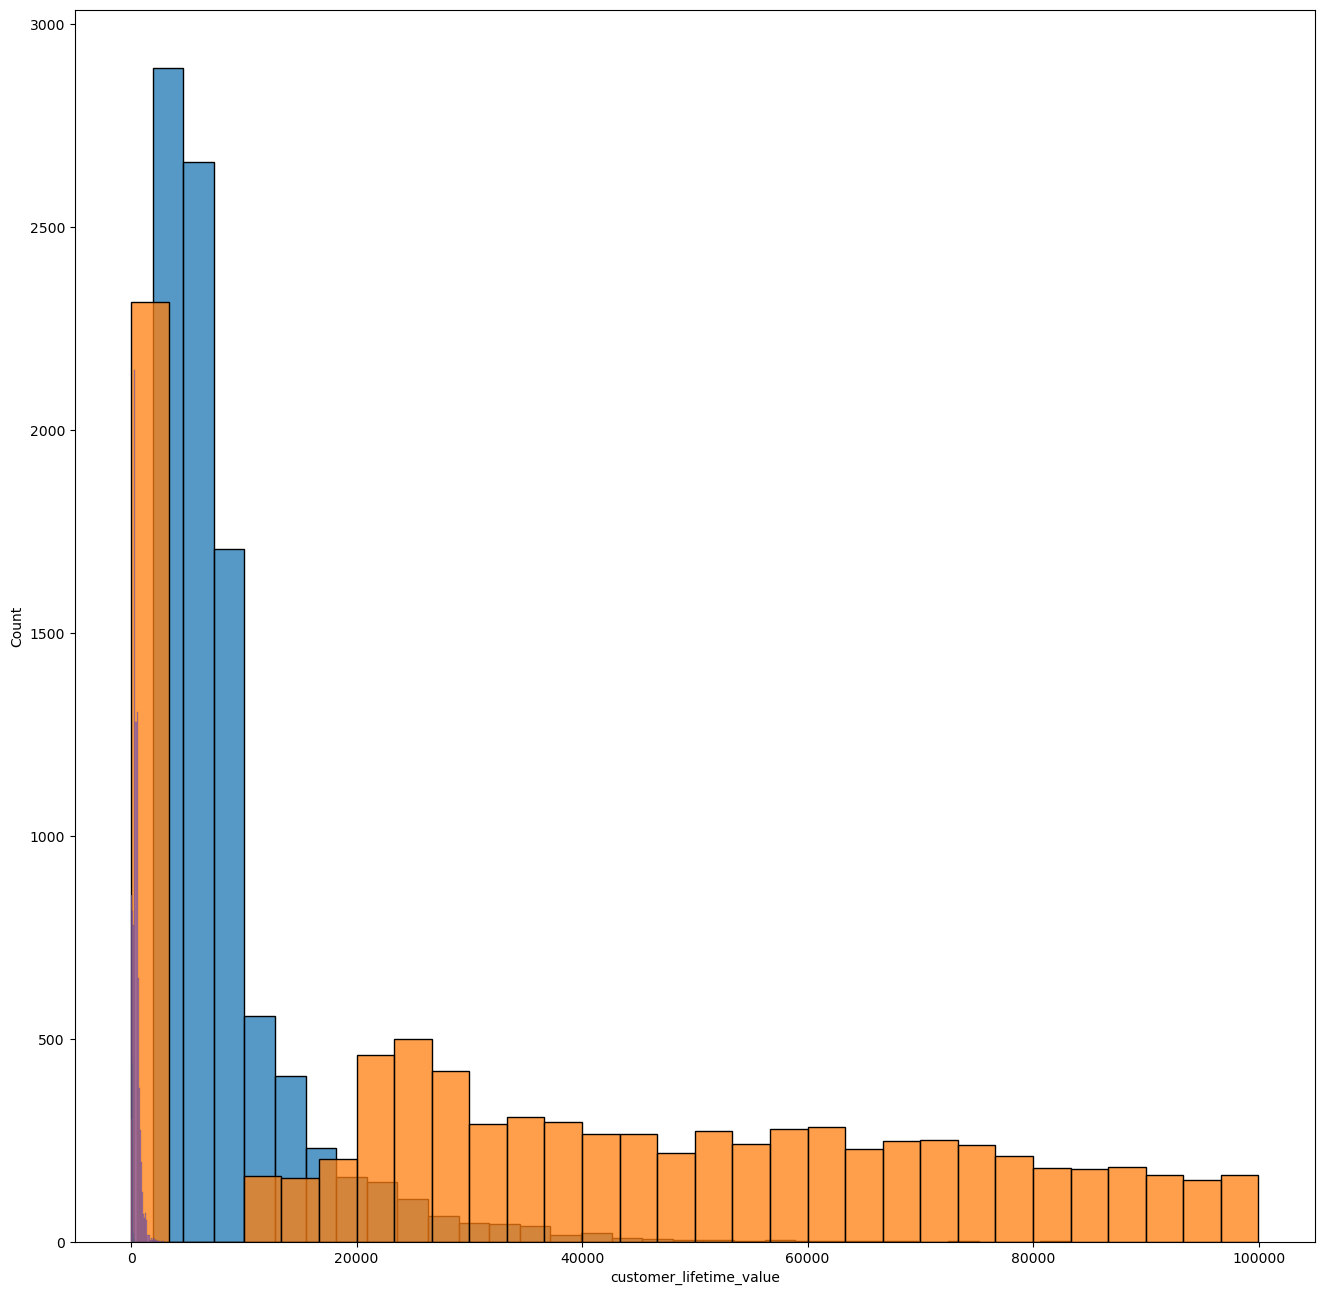

In [24]:
#12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def plot_continuous_histograms(continuous):
    """
    Create histograms for all columns in the DataFrame with continuous values.

    Parameters:
    continuous: pd.DataFrame

    """
plt.figure(figsize=(16, 16))

for column in continuous.columns:
    sns.histplot(continuous[column], kde=False, bins=30)  

plt.show()

plot_continuous_histograms(continuous)

In [25]:
#13. According to the previous histogram plots, do you think that you will have to apply any transformation?

# Yes, because the plots overlap.

In [26]:
#14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.


LAB CLEANING CATEGORICAL DATA

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis

In [27]:
#Have a look at the categorical columns

categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
#Create a seaborn countplot
import seaborn as sns
import matplotlib.pyplot as plt

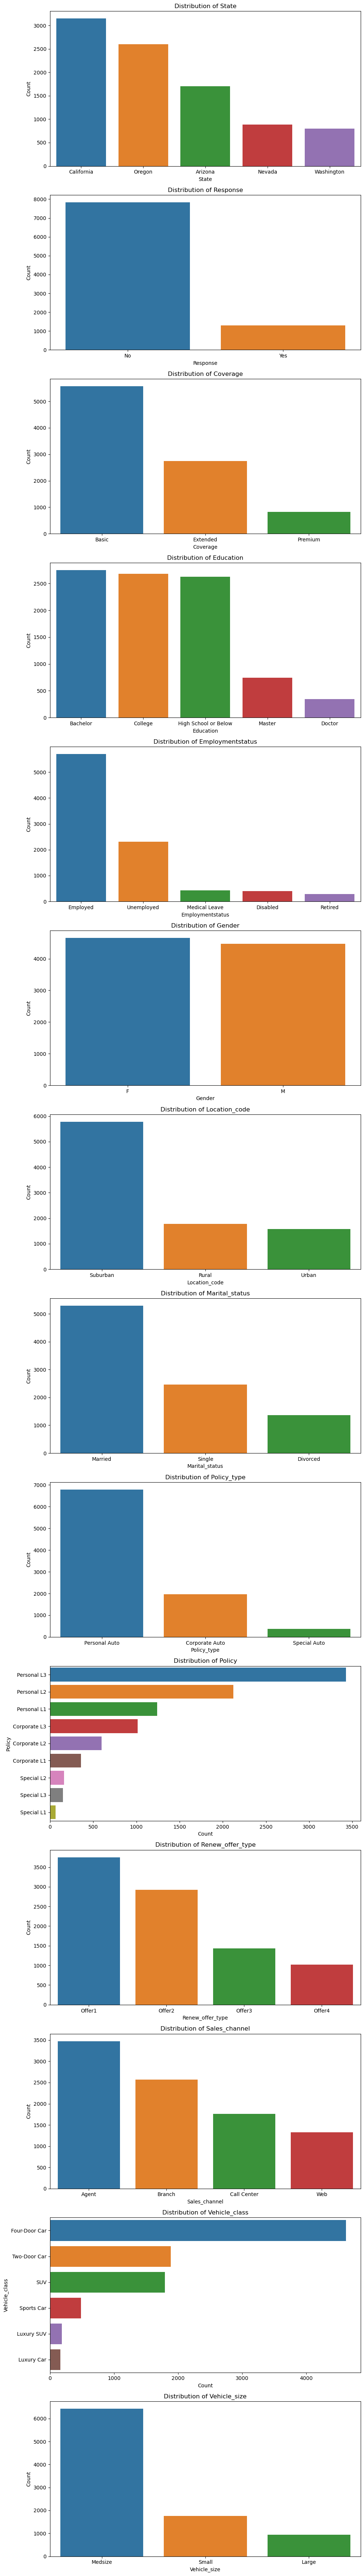

In [29]:
#Create a function

def categorical_columns_sns_countplot(categorical_columns):
    '''
    Creates a seaborn countplot of each categorical column in a PandaDataframe.
    Parameters:
    categorical_columns: pd.DataFrame
    '''

fig, axes = plt.subplots(nrows=len(categorical_df.columns), ncols=1, figsize=(10, 5 * len(categorical_df.columns)))

for i, column in enumerate(categorical_df.columns):
    
    if categorical_df[column].nunique() >= 6:
        sns.countplot(y=column, data=categorical_df, ax=axes[i], order=categorical_df[column].value_counts().index)
    else:
        sns.countplot(x=column, data=categorical_df, ax=axes[i], order=categorical_df[column].value_counts().index)


    if categorical_df[column].nunique() >= 6:
        axes[i].set_ylabel(column.capitalize())  
        axes[i].set_xlabel('Count')
    else:
        axes[i].set_xlabel(column.capitalize())  
        axes[i].set_ylabel('Count')

    axes[i].set_title(f'Distribution of {column.capitalize()}')
    
plt.tight_layout()
plt.show()

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [30]:
#Drop the columns 'policy_type'
categorical_df.drop(columns=['policy_type'], inplace=True)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
#check the column 'policy'
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [32]:
#Create a function to transform the column 'policy' to three possible values: L1, L2, and L3
def transform_policy(value):
    if 'L1' in value:
        return 'L1'
    elif 'L2' in value:
        return 'L2'
    elif 'L3' in value:
        return 'L3'

categorical_df['policy'] = categorical_df['policy'].apply(transform_policy)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

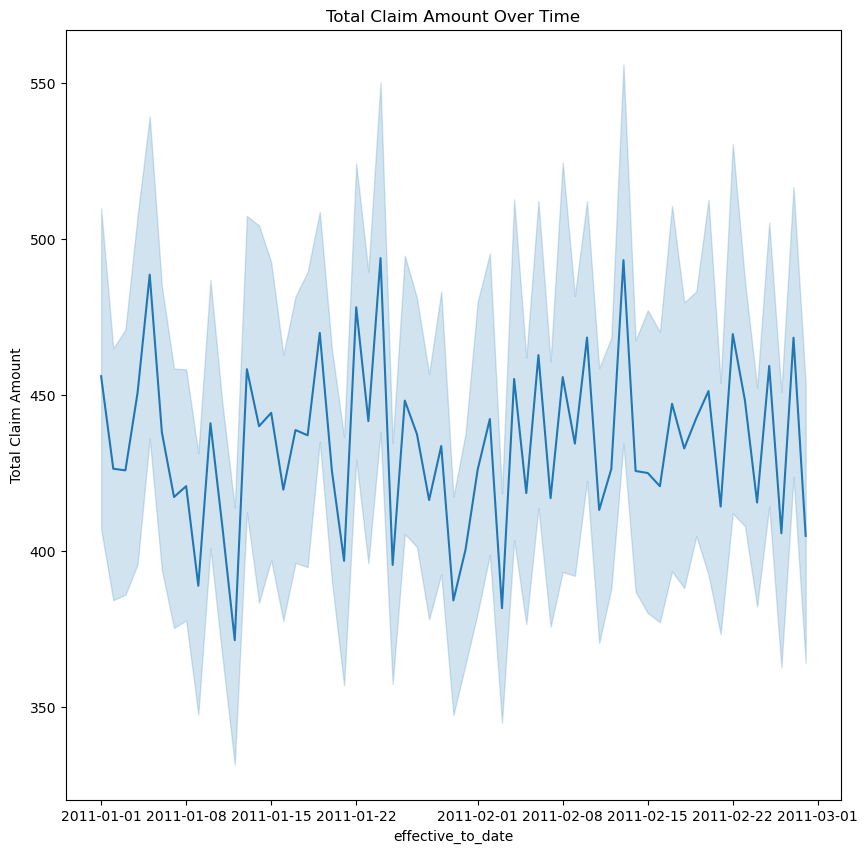

In [33]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)

plt.xlabel('effective_to_date')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount Over Time')

plt.show()

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [34]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [35]:
# Create an empty DataFrame
date_df = pd.DataFrame()

# Copy the 'effective_to_date' and 'total_claim_amount' columns from the original DataFrame
date_df['effective_to_date'] = customer_df['effective_to_date']
date_df['total_claim_amount'] = customer_df['total_claim_amount']

# Extract day, day_name, week, and month from 'effective_to_date'
date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()

display(date_df.head())

,effective_to_date,total_claim_amount,day,day_name,week,month
0,2011-02-24,384.811147,24,Thursday,8,February
1,2011-01-31,1131.464935,31,Monday,5,January
2,2011-02-19,566.472247,19,Saturday,7,February
3,2011-01-20,529.881344,20,Thursday,3,January
4,2011-02-03,138.130879,3,Thursday,5,February


5.Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [36]:
# Round the 'total_claim_amount' column to two decimals
date_df['total_claim_amount'] = date_df['total_claim_amount'].round(2)

display(date_df)

,effective_to_date,total_claim_amount,day,day_name,week,month
0,2011-02-24,384.81,24,Thursday,8,February
1,2011-01-31,1131.46,31,Monday,5,January
2,2011-02-19,566.47,19,Saturday,7,February
3,2011-01-20,529.88,20,Thursday,3,January
4,2011-02-03,138.13,3,Thursday,5,February
...,...,...,...,...,...,...
9129,2011-02-10,198.23,10,Thursday,6,February
9130,2011-02-12,379.20,12,Saturday,6,February
9131,2011-02-06,790.78,6,Sunday,5,February
9132,2011-02-03,691.20,3,Thursday,5,February


In [37]:
total_target_per_day = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)

# List of correct days for reordering the index
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate again using reindex
total_target_per_day_reordered = date_df.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_days)

# Display the resulting Series
print(total_target_per_day_reordered)

day_name
Monday       655689.67
Tuesday      502518.87
Wednesday    541563.08
Thursday     541821.10
Friday       533658.74
Saturday     608060.25
Sunday       581655.70
Name: total_claim_amount, dtype: float64


6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

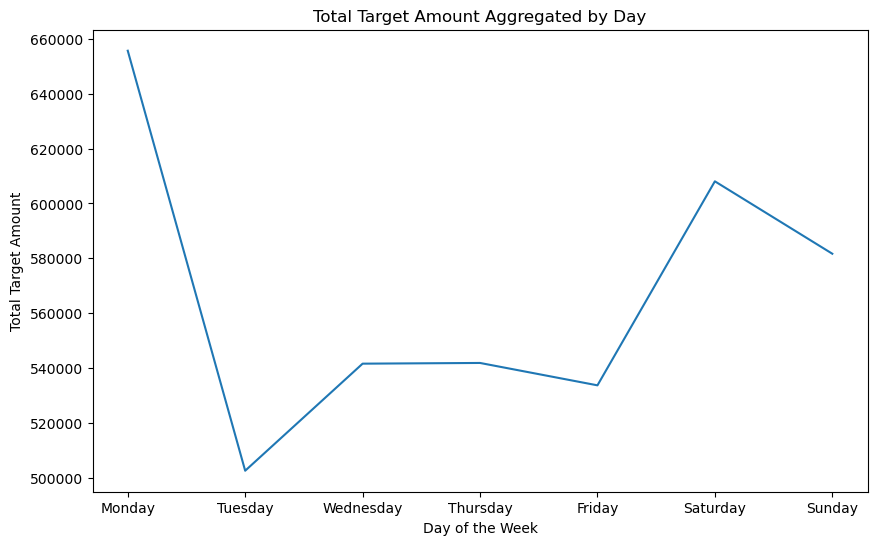

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_target_per_day_reordered.index, y=total_target_per_day_reordered.values)

plt.xlabel('Day of the Week')
plt.ylabel('Total Target Amount')
plt.title('Total Target Amount Aggregated by Day')

plt.show()

Yes, we see hugh differences by day of the week.

8.Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [39]:
# Calculate the median total_claim_amount by day_name
median_day = date_df.groupby('day_name')['total_claim_amount'].median()

# Sort the values in descending order
median_claim_per_day_sorted = median_day.sort_values(ascending=False)

# Display the resulting Series
print(median_claim_per_day_sorted)

day_name
Thursday     395.330
Wednesday    392.240
Monday       385.735
Sunday       383.720
Saturday     379.200
Tuesday      378.490
Friday       371.800
Name: total_claim_amount, dtype: float64


9.Plot the median "target" by day of the week name using a seaborn barplot

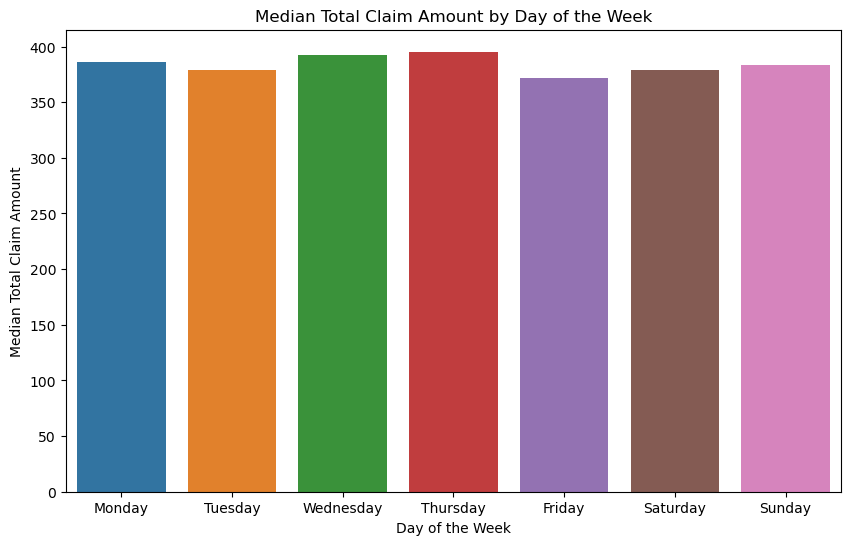

In [40]:
# Calculate the median total_claim_amount by day_name
median_day = date_df.groupby('day_name')['total_claim_amount'].median().reset_index()

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='total_claim_amount', data=median_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Median Total Claim Amount')
plt.title('Median Total Claim Amount by Day of the Week')

# Display the plot
plt.show()

10. What can you conclude from this analysis?

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [41]:
# Compute the total_claim_amount column aggregated by month and round to two decimals
tca_month = date_df.groupby('month')['total_claim_amount'].sum().round(2)

# List of correct months for reordering the index
list_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the index using .reindex()
tca_month_reordered = tca_month.reindex(index=list_month)

# Display the resulting Series
print(tca_month_reordered)

month
January      2117142.93
February     1847824.48
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64


12. Can you do a monthly analysis given the output of the previous series? Why?

Yes 

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [42]:
def remove_outliers_std(dataframe, column_name, threshold=3):
    mean_val = dataframe[column_name].mean()
    std_val = dataframe[column_name].std()
    lower_bound = mean_val - threshold * std_val
    upper_bound = mean_val + threshold * std_val
    return dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]


14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [43]:
# Take the "continuous" DataFrame from the previous Lab
continuous = df[continuous_df]
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [44]:
#Columns to be cleaned
continuous_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount'] 

#Create a continous cleaned df
continuous_clean_df = continuous.copy() 

#Apply the 'remove_outliers_std' function defined above
for column in continuous_columns:
    continuous_clean_df = remove_outliers_std(continuous_clean_df, column)

display(continuous_clean_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


15.Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [45]:
#I suppose "time_df" is the what I called "date_df", created in question 4.

In [46]:
#Let's have a look at 'date_df' to see which columns could be relevant
date_df.head()

,effective_to_date,total_claim_amount,day,day_name,week,month
0,2011-02-24,384.81,24,Thursday,8,February
1,2011-01-31,1131.46,31,Monday,5,January
2,2011-02-19,566.47,19,Saturday,7,February
3,2011-01-20,529.88,20,Thursday,3,January
4,2011-02-03,138.13,3,Thursday,5,February


In [47]:
#Let's have a look at the other DataFrames

In [48]:
discrete.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [49]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


In [50]:
#Add the relevant columns fron 'date_df' to 'continuous_clean_df'
continuous_clean_df[['day','day_name','week','month']] = date_df[['day','day_name','week','month']]
display(continuous_clean_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,day,day_name,week,month
0,2763.519279,56274,69,5,384.811147,24,Thursday,8,February
1,6979.535903,0,94,42,1131.464935,31,Monday,5,January
2,12887.431650,48767,108,38,566.472247,19,Saturday,7,February
3,7645.861827,0,106,65,529.881344,20,Thursday,3,January
4,2813.692575,43836,73,44,138.130879,3,Thursday,5,February


In [51]:
#Concatenate the DataFrames
result_df = pd.concat([continuous_clean_df, discrete, categorical_df], axis=1)

display(result_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,day,day_name,week,month,months_since_last_claim,...,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274.0,69.0,5.0,384.811147,24.0,Thursday,8,February,32,...,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0.0,94.0,42.0,1131.464935,31.0,Monday,5,January,13,...,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767.0,108.0,38.0,566.472247,19.0,Saturday,7,February,18,...,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0.0,106.0,65.0,529.881344,20.0,Thursday,3,January,18,...,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836.0,73.0,44.0,138.130879,3.0,Thursday,5,February,12,...,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,15,...,High School or Below,Unemployed,F,Suburban,Single,L3,Offer4,Branch,Two-Door Car,Small
9103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,24,...,Bachelor,Employed,F,Suburban,Single,L3,Offer1,Agent,Luxury SUV,Large
9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,23,...,College,Unemployed,M,Suburban,Single,L3,Offer1,Branch,SUV,Medsize
9110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,10,...,High School or Below,Employed,F,Suburban,Married,L2,Offer2,Agent,Sports Car,Medsize


In [52]:
#Use pd.dropna() and .reset_index() to fix the final dataframe
result_df = result_df.dropna().reset_index(drop=True)

display(result_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,day,day_name,week,month,months_since_last_claim,...,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274.0,69.0,5.0,384.811147,24.0,Thursday,8,February,32,...,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0.0,94.0,42.0,1131.464935,31.0,Monday,5,January,13,...,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767.0,108.0,38.0,566.472247,19.0,Saturday,7,February,18,...,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0.0,106.0,65.0,529.881344,20.0,Thursday,3,January,18,...,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836.0,73.0,44.0,138.130879,3.0,Thursday,5,February,12,...,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,10.0,Thursday,6,February,18,...,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
8571,3096.511217,21604.0,79.0,28.0,379.200000,12.0,Saturday,6,February,14,...,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
8572,8163.890428,0.0,85.0,37.0,790.784983,6.0,Sunday,5,February,9,...,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
8573,7524.442436,21941.0,96.0,3.0,691.200000,3.0,Thursday,5,February,34,...,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column

In [53]:
#Get the column's list
columns = result_df.columns.tolist()

# Place 'total_claim_amount' at the end of the DataFrame
columns.remove('total_claim_amount')
columns.append('total_claim_amount')

# Reorder the columns
result_df = result_df[columns]

display(result_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,day,day_name,week,month,months_since_last_claim,number_of_open_complaints,...,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,24.0,Thursday,8,February,32,0,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,6979.535903,0.0,94.0,42.0,31.0,Monday,5,January,13,0,...,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,12887.431650,48767.0,108.0,38.0,19.0,Saturday,7,February,18,0,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,7645.861827,0.0,106.0,65.0,20.0,Thursday,3,January,18,0,...,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2813.692575,43836.0,73.0,44.0,3.0,Thursday,5,February,12,0,...,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,10.0,Thursday,6,February,18,0,...,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,198.234764
8571,3096.511217,21604.0,79.0,28.0,12.0,Saturday,6,February,14,0,...,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
8572,8163.890428,0.0,85.0,37.0,6.0,Sunday,5,February,9,3,...,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
8573,7524.442436,21941.0,96.0,3.0,3.0,Thursday,5,February,34,0,...,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,691.200000


17. Turn the response column values into (Yes=1/No=0).

In [54]:
# Utiliser la fonction replace pour effectuer la transformation
customer_df['response'] = customer_df['response'].replace({'Yes': 1, 'No': 0})

# Afficher le résultat
display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [55]:
customer_df['education'] = customer_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})

# Afficher le résultat
display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [56]:
customer_df['employmentstatus'] = customer_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})

display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


20.Deal with column Gender turning the values into (1/0)

In [57]:
customer_df['gender'] = customer_df['gender'].replace({'F': 1, 'M': 0})

display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,1,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,1,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,1,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,0,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,0,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [58]:
customer_df['vehicle_class'] = customer_df['vehicle_class'].replace({'Sports Car': 'Luxury ', 'Luxury SUV': 'Luxury ', 'Luxury Car': 'Luxury '})

display(customer_df)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,1,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,1,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,1,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,0,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,0,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,0,Basic,Bachelor,2011-02-10,Employed,0,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,1,Extended,College,2011-02-12,Employed,1,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,0,Extended,Bachelor,2011-02-06,Unemployed,0,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,0,Extended,College,2011-02-03,Employed,0,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [59]:
customer_df['coverage'] = customer_df['coverage'].replace({'Basic': 1, 'Extended': 2, 'Premium': 3})

display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,1,Bachelor,2011-02-24,Employed,1,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,2,Bachelor,2011-01-31,Unemployed,1,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,3,Bachelor,2011-02-19,Employed,1,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,1,Bachelor,2011-01-20,Unemployed,0,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,1,Bachelor,2011-02-03,Employed,0,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [60]:
customer_df['employmentstatus'] = customer_df['employmentstatus'].replace({'Employed': 3, 'Inactive': 2, 'Unemployed': 1})
display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,1,Bachelor,2011-02-24,3,1,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,2,Bachelor,2011-01-31,1,1,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,3,Bachelor,2011-02-19,3,1,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,1,Bachelor,2011-01-20,1,0,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,1,Bachelor,2011-02-03,3,0,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


24.Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [61]:
customer_df['location_code'] = customer_df['location_code'].replace({'Urban': 3, 'Suburban': 2, 'Rural': 1})
display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,1,Bachelor,2011-02-24,3,1,56274,2,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,0,2,Bachelor,2011-01-31,1,1,0,2,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,0,3,Bachelor,2011-02-19,3,1,48767,2,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,0,1,Bachelor,2011-01-20,1,0,0,2,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,0,1,Bachelor,2011-02-03,3,0,43836,1,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [62]:
customer_df['vehicle_size'] = customer_df['vehicle_size'].replace({'Large': 3, 'Medsize': 2, 'Small': 1})
display(customer_df.head())

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,0,1,Bachelor,2011-02-24,3,1,56274,2,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,2
1,Arizona,6979.535903,0,2,Bachelor,2011-01-31,1,1,0,2,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,2
2,Nevada,12887.431650,0,3,Bachelor,2011-02-19,3,1,48767,2,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,2
3,California,7645.861827,0,1,Bachelor,2011-01-20,1,0,0,2,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,2
4,Washington,2813.692575,0,1,Bachelor,2011-02-03,3,0,43836,1,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,2


In [63]:
#I suppose I should have made a function in the beginning ;)

def encode_categorical_column(df, column, mapping):
    df[column] = df[column].replace(mapping)

# Mapping for each column
coverage_mapping = {'Basic': 1, 'Extended': 2, 'Premium': 3}
employmentstatus_mapping = {'Employed': 3, 'Inactive': 2, 'Unemployed': 1}
location_code_mapping = {'Urban': 3, 'Suburban': 2, 'Rural': 1}
vehicle_size_mapping{'Large': 3, 'Medsize': 2, 'Small': 1}

#Columns to encode
columns_to_encode = ['coverage', 'employmentstatus', 'location_code','vehicle_size_mapping' ]

#Apply the function
for column in columns_to_encode:
    encode_categorical_column(customer_df, column, coverage_mapping)

SyntaxError: invalid syntax (356337370.py, line 10)

26. Get a dataframe with the categorical nominal columns

In [64]:
categorical_nominal_df = customer_df.select_dtypes(exclude=['number'])

display(categorical_nominal_df.head())

,state,education,effective_to_date,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,2011-02-24,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,2011-01-31,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,2011-02-19,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,2011-01-20,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,Bachelor,2011-02-03,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column

In [65]:
categorical_nominal_df = customer_df.select_dtypes(exclude=['number'])

#Create a list of named levels
levels = []

# Get unique values for each categorical nominal columns
for column in categorical_nominal_df.columns:
    unique_values = list(customer_df[column].unique())
    
    #fill the list with the unique values
    levels.append(unique_values)


print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [numpy.datetime64('2011-02-24T00:00:00.000000000'), numpy.datetime64('2011-01-31T00:00:00.000000000'), numpy.datetime64('2011-02-19T00:00:00.000000000'), numpy.datetime64('2011-01-20T00:00:00.000000000'), numpy.datetime64('2011-02-03T00:00:00.000000000'), numpy.datetime64('2011-01-25T00:00:00.000000000'), numpy.datetime64('2011-01-18T00:00:00.000000000'), numpy.datetime64('2011-01-26T00:00:00.000000000'), numpy.datetime64('2011-02-17T00:00:00.000000000'), numpy.datetime64('2011-02-21T00:00:00.000000000'), numpy.datetime64('2011-01-06T00:00:00.000000000'), numpy.datetime64('2011-02-06T00:00:00.000000000'), numpy.datetime64('2011-01-10T00:00:00.000000000'), numpy.datetime64('2011-01-17T00:00:00.000000000'), numpy.datetime64('2011-01-05T00:00:00.000000000'), numpy.datetime64('2011-02-27T00:00:00.000000000'), numpy.datetime64('2011-01-14T00:00:00.000000000'), numpy.dat

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder = OneHotEncoder(drop='first', categories=levels)

print(encoder)

OneHotEncoder(categories=[['Washington', 'Arizona', 'Nevada', 'California',
                           'Oregon'],
                          ['Bachelor', 'College', 'Graduate',
                           'High School or Below'],
                          [numpy.datetime64('2011-02-24T00:00:00.000000000'),
                           numpy.datetime64('2011-01-31T00:00:00.000000000'),
                           numpy.datetime64('2011-02-19T00:00:00.000000000'),
                           numpy.datetime64('2011-01-20T00:00:00.000000000'),
                           numpy.datetim...
                           numpy.datetime64('2011-01-28T00:00:00.000000000'), ...],
                          ['Married', 'Single', 'Divorced'],
                          ['Corporate Auto', 'Personal Auto', 'Special Auto'],
                          ['Corporate L3', 'Personal L3', 'Corporate L2',
                           'Personal L1', 'Special L2', 'Corporate L1',
                           'Personal L2', 'Spe